In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(r'/Users/amoghabn/Documents/ASUacad/DVsem3Summer2023/Project/adult.data', header=None, names=columns)
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Replace "?" values with "Not Available"
data['workclass'] = data['workclass'].replace('?', 'none')
data['occupation'] = data['occupation'].replace('?', 'none')
data['native-country'] = data['native-country'].replace('?', 'none')

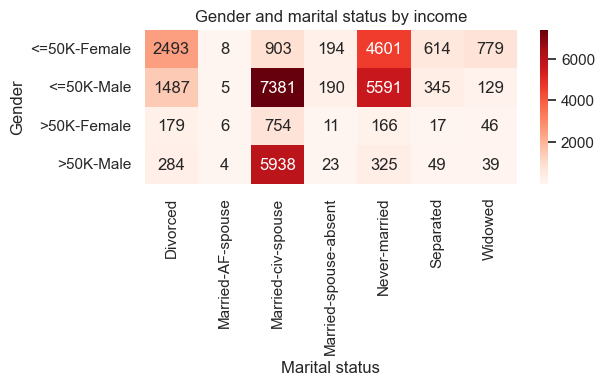

In [196]:
# Create heat map showing Gender and marital status by income
edu_occ_count = data.groupby(["income", "sex", "marital-status"]).size().unstack()
sns.set(rc={'figure.figsize':(6,2)})
sns.heatmap(edu_occ_count, cmap="Reds", annot=True, fmt=".0f")
plt.title("Gender and marital status by income")
plt.xlabel("Marital status")
plt.ylabel("Gender")
plt.show()

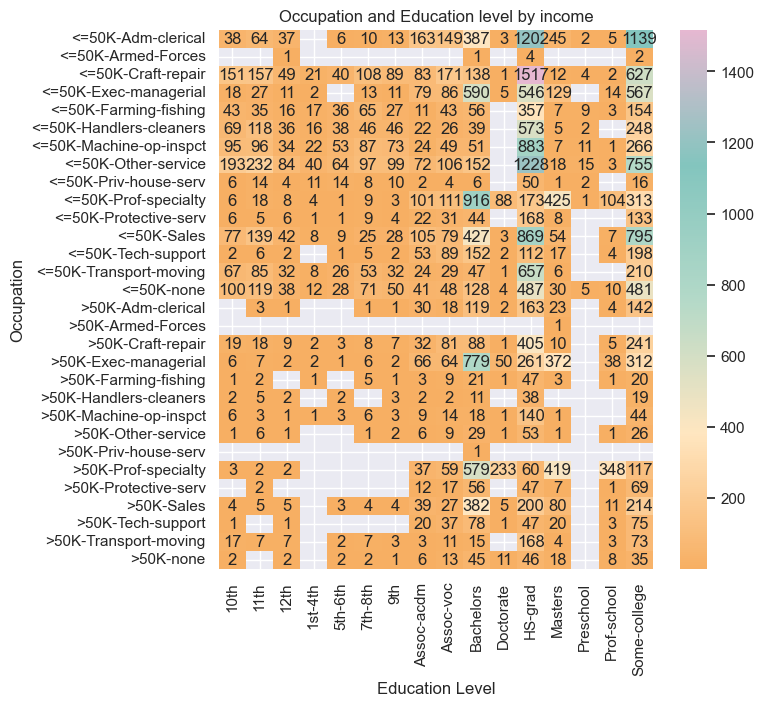

In [179]:
# Create heat map showing education level and occupation by income
from matplotlib.colors import LinearSegmentedColormap
colors = ['#F7AF63', '#FFE6C0', '#B3D9C8', '#83C5BE', '#E6B8D1']
ciao_bella_cmap = LinearSegmentedColormap.from_list('ciao_bella', colors)
edu_occ_count = data.groupby(["income", "occupation", "education"]).size().unstack()
sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(edu_occ_count, cmap=ciao_bella_cmap, annot=True, fmt=".0f")
plt.title("Occupation and Education level by income")
plt.xlabel("Education Level")
plt.ylabel("Occupation")
plt.show()

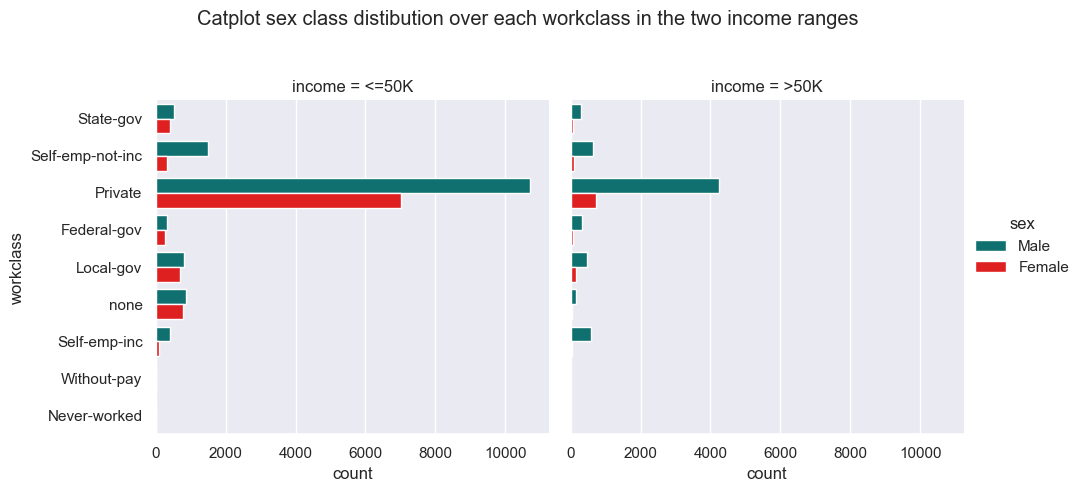

In [197]:
#Create Catplot sex class distibution over each workclass
def workclass_sex(x):
    custom_palette = ["#008080", "Red"]
    catPlot = sns.catplot(y="workclass", col="income", hue="sex", kind="count", data=x, palette=custom_palette) 
    catPlot.fig.suptitle("Catplot sex class distibution over each workclass in the two income ranges") 
    catPlot.fig.subplots_adjust(top=0.8)
workclass_sex(data)

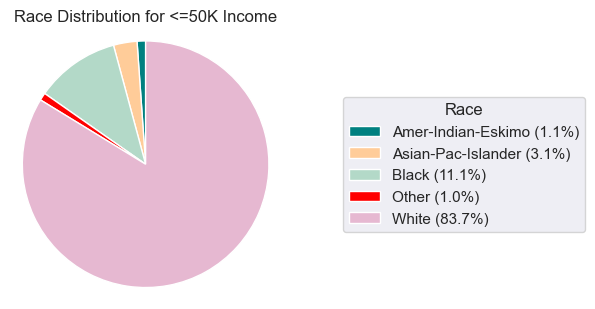

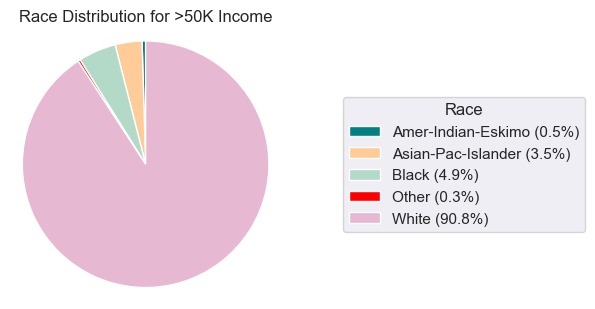

In [128]:
# Group data by income and race
race_income = data.groupby(['income', 'race']).size().unstack()

# Iterate over each income category
for income_category in race_income.index:
    # Get the counts of race categories for the specific income category
    race_counts = race_income.loc[income_category]
    
    # Calculate the percentages for each race category
    percentages = race_counts / race_counts.sum() * 100
    
    # Set the figure size
    plt.figure(figsize=(3.5, 3.5))
    
    # Plot pie chart for the race distribution
    pie = plt.pie(race_counts, labels=[None] * len(race_counts), startangle=90, colors=['#008080', '#FFCC99', '#B3D9C8', 'Red', '#E6B8D1'])
    plt.title(f"Race Distribution for {income_category} Income")
    plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    
    # Add legend with labels and percentages
    labels = [f"{label} ({percent:.1f}%)" for label, percent in zip(race_counts.index, percentages)]
    legend = plt.legend(pie[0], labels, title='Race', loc='center left', bbox_to_anchor=(1, 0.5))
    legend.set_bbox_to_anchor((1.2, 0.5))  # Adjust the position of the legend
    
    plt.show()


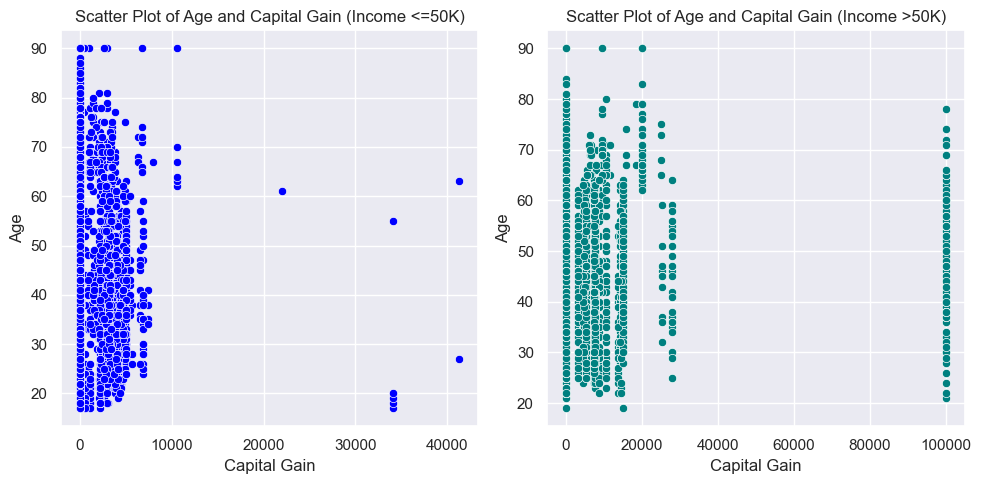

In [160]:
# Filter the data for each income category
income_low = data[data['income'] == '<=50K']
income_high = data[data['income'] == '>50K']

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot for income <=50K
sns.scatterplot(x="capital-gain", y="age", data=income_low, color='blue', ax=axes[0])
axes[0].set_xlabel("Capital Gain")
axes[0].set_ylabel("Age")
axes[0].set_title("Scatter Plot of Age and Capital Gain (Income <=50K)")

# Scatter plot for income >50K
sns.scatterplot(x="capital-gain", y="age", data=income_high, color='#008080', ax=axes[1])
axes[1].set_xlabel("Capital Gain")
axes[1].set_ylabel("Age")
axes[1].set_title("Scatter Plot of Age and Capital Gain (Income >50K)")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


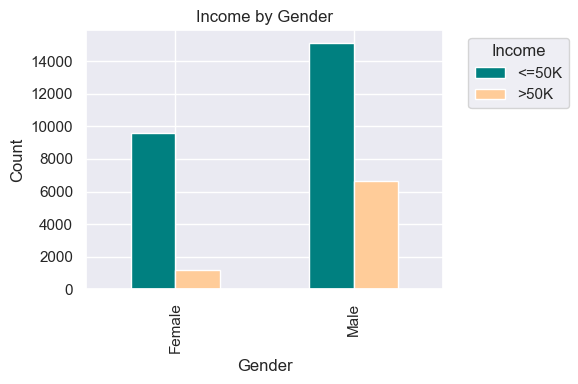

In [198]:
# Bar chart of income by gender
gender_income = data.groupby(['sex', 'income']).size().unstack()
ax = gender_income.plot(kind='bar', color=['#008080', '#FFCC99'], figsize=(6, 4))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Income by Gender')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the bbox_to_anchor value as needed
plt.tight_layout()
plt.show()
